In [4]:

from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import LinearSVR, SVR

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


file = r'C:\Users\Carlos\Documents\UPM\Máster\MLL\Half-Term-OSA-Python-master\DATA\OSA_DB_final.xlsx'
# Load spreadsheet
xl = pd.ExcelFile(file)

# Print the sheet names
print(xl.sheet_names)


['Sheet1']


In [5]:
# Load a sheet into a DataFrame by name: df_OSA_extreme
df_OSA = xl.parse('Sheet1')
df_OSA.head(5)

,Patient,Gender,IAH,Peso,Talla,IMC,Edad,PerCervical,Fumador,Enfermedades,OSA
0,P0004,1,19.7,78,1.68,27.636054,39,42.0,0,1,Medium
1,P0005,1,9.0,80,1.73,26.729927,32,40.0,0,1,Healthy
2,P0006,1,2.0,109,1.90,30.193906,32,42.0,0,1,Healthy
3,P0007,1,34.0,86,1.69,30.110991,39,42.0,0,1,Severe
4,P0008,1,60.0,145,1.72,49.012980,47,44.0,0,1,Severe


In [58]:
x_features = ["Edad","PerCervical","Peso", 'IMC', 'Gender']
X = df_OSA[x_features] 
y = df_OSA["IAH"]
model=LinearRegression()

In [60]:
parameters = { 'n_jobs':[1, 2, 3], 'fit_intercept':[True,  False], 'normalize':[True,  False], 'copy_X':[True,  False]}
clf = GridSearchCV(model, parameters, cv=10)
clf.fit(X,y)
clf.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [52]:
model=LinearRegression(n_jobs=1)
y_pred = cross_val_predict(model,X,y,cv=10)

In [53]:

mae = round(mean_absolute_error(y, y_pred),2)
rmsd = round(math.sqrt(mean_squared_error(y, y_pred)),2)
r2 = round(r2_score(y, y_pred)*100,2)
error = [y_pred[i] - y[i] for i in range(len(y_pred))]

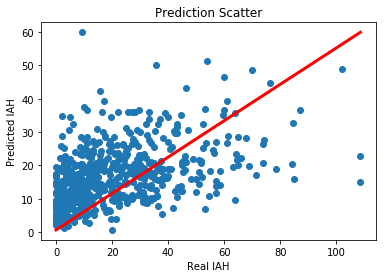

In [16]:
plt.title('Prediction Scatter'), plt.xlabel('Real IAH'), plt.ylabel('Predicted IAH')
plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y_pred.min(), y_pred.max()], 'r', lw=3)
plt.show()


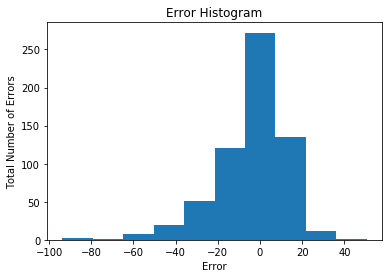

In [17]:
plt.title('Error Histogram'), plt.xlabel('Error'), plt.ylabel('Total Number of Errors')
plt.hist(error, bins=10)
plt.show()

In [40]:
abs_error = [abs(x) for x in error]
abs_error
#plt.ylabel('Absolute Error')
#plt.title('Error Boxplot')
#plt.boxplot(abs_error)
#plt.show()

[2.803764294089607,
 2.8131894780807656,
 15.340322046651792,
 17.091190594359851,
 20.421024670977083,
 6.0263686611044491,
 0.1067157251687334,
 1.0904551986649267,
 12.585412837262027,
 9.0367974660389976,
 6.4613880502235119,
 1.5973538981050126,
 20.037837267305552,
 19.463202763220604,
 28.232495984430777,
 2.9265275849789276,
 23.4875177683437,
 12.160064529047732,
 9.4982741246664588,
 11.97889324574377,
 9.7669930071880895,
 8.1579800601689598,
 2.8138325222925573,
 1.1357733618285266,
 5.8024887113567942,
 6.0975617798306381,
 5.3565405979650578,
 3.6273111358079646,
 7.2147535657078663,
 9.0814721419648983,
 15.437357242775953,
 7.1627617731009252,
 3.8676390723995731,
 9.1777883389403172,
 23.811768720130075,
 6.9179204632686719,
 30.676742126974574,
 12.569579506033577,
 24.652731441721883,
 4.7963782650943045,
 7.3424572280140445,
 19.981940695719025,
 18.444670213642951,
 44.522650680036605,
 5.719283315458604,
 18.0964407631784,
 16.418398967893538,
 11.691113025873712,

In [54]:
r2

20.640000000000001

In [55]:
mae

12.550000000000001

In [56]:
rmsd

16.62